# 數據科學概論 Hw5 (含 Hw4 以前)

0416235 劉昱劭

<a href="#Deal-with-missing-value-(Hw3)">Hw3</a>
<a href="#Visualization-(Hw4)">Hw4</a>
<a href="#Hw5">Hw5</a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
protein = pd.read_csv("nuclear.csv")

In [3]:
# mean & stdev of each class
print('Mean(cm): \n', protein.groupby(['class']).mean())
print('-'*80,'\n')
print('Stdev(cm): \n', protein.groupby(['class']).std())
print('-'*80)

Mean(cm): 
         DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
class                                                                          
c-CS-m  0.480456  0.652587  0.339217  2.381749  4.308540  0.229932  0.182211   
c-CS-s  0.596748  0.772395  0.342315  2.417809  4.280077  0.212423  0.168356   
c-SC-m  0.273203  0.436361  0.290946  2.145633  3.459416  0.241253  0.189547   
c-SC-s  0.274823  0.449354  0.313393  2.404974  3.913096  0.233368  0.184975   
t-CS-m  0.619294  0.797007  0.312732  2.196541  3.565960  0.213621  0.173956   
t-CS-s  0.525735  0.759556  0.305460  2.184606  3.514839  0.214466  0.164795   
t-SC-m  0.329861  0.566783  0.321063  2.379446  4.056223  0.269131  0.201007   
t-SC-s  0.337488  0.549056  0.325586  2.248742  3.565093  0.246759  0.185318   

        pCAMKII_N   pCREB_N    pELK_N    ...        SHH_N     BAD_N    BCL2_N  \
class                                    ...                                    
c-CS-m   2.916187  0.1984

In [4]:
proteinData = [protein.iloc[:,1:18], protein.iloc[:,11:21], protein.iloc[:,21:31], protein.iloc[:,31:41], 
               protein.iloc[:,41:51], protein.iloc[:,51:61], protein.iloc[:,61:71], protein.iloc[:,71:78]]
#print(proteinData)

In [5]:
proteinClass = protein.iloc[:, 78:82]
#print(proteinClass)

## Deal with missing value (Hw3)
<a href="#%E6%95%B8%E6%93%9A%E7%A7%91%E5%AD%B8%E6%A6%82%E8%AB%96-Hw5-(%E5%90%AB-Hw4-%E4%BB%A5%E5%89%8D)">Top</a>
1. Drop missing value
2. Fill missing value with mean 

In [6]:
# 挑出要分析的 attribute，和 class
sub_protein = pd.concat([proteinData[0],proteinClass], axis=1)
sub_protein.describe(percentiles=[])

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.233168     0.181846     3.537109     0.212574     1.428682   
std       0.041634     0.027042     1.295169     0.032587     0.466904   
min       0.063236     0.064043     1.343998     0.112812     0.429032   
50%       0.231177     0.182302     3.326520     0.210594     1.355846   
max       0.539050     0.317066     7.464070     0.306247     6.113347   

            pERK_N       pJNK_N       PKCA_N       pMEK_N       pNR1_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.545904     0.313505     0.317939     0.275033     0.825813   
std       0.345309     0.051978     0.052236     0.046164     0.117969   
min       0.149155     0.052110     0.191431     0.056818     0.500160   
50%       0.443644     0.321330     0.312977     0.277393     0.821076   
max       3.566685     0.493426     0.473992     0.458001     1.408169   

           pNR2A_N      pNR2B_N  
count  1077.000000  1077.000000  
mean      0.726933     1.561965  
std       0.188013     0.270737  
min       0.281285     0.301609  
50%       0.719591     1.563696  
max       1.412750     2.723965

In [7]:
na_cols = sub_protein.columns[sub_protein.isna().any()].tolist()
print(na_cols)

['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N']


In [8]:
## drop 
proteinClean = sub_protein.dropna()
#print(proteinClean)

In [9]:
## fill missing value with mean of each group
fill_protein = sub_protein.copy()
for n in na_cols:
    fill_protein[n] = fill_protein.groupby(['class'], sort=False)[n].apply(lambda x: x.fillna(x.mean()))
    #protein[x] = protein.groupby("class").transform(lambda x: x.fillna(x.mean()))
    #for c in proteinClass['class'].unique():
    #print(c)
#proteinFill = protein.fillna(,inplace=True)

In [10]:
# 印出有 missing value 的 column

## 未處理 missing value 的原資料
na_cols = sub_protein.columns[sub_protein.isna().any()].tolist()
print(na_cols)

## fill_protein 已用平均值填補完，沒有 missing value，印出 empty list
na_cols = fill_protein.columns[fill_protein.isna().any()].tolist()
print(na_cols)


['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N']
[]


In [11]:
sub_protein.describe(percentiles=[], include='all')

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count   1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.425810     0.617102     0.319088     2.297269     3.843934   
std        0.249362     0.251640     0.049383     0.347293     0.933100   
min        0.145327     0.245359     0.115181     1.330831     1.737540   
50%        0.366378     0.565782     0.316564     2.296546     3.760855   
max        2.516367     2.602662     0.497160     3.757641     8.482553   

             pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  \
count   1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.233168     0.181846     3.537109     0.212574     1.428682   
std        0.041634     0.027042     1.295169     0.032587     0.466904   
min        0.063236     0.064043     1.343998     0.112812     0.429032   
50%        0.231177     0.182302     3.326520     0.210594     1.355846   
max        0.539050     0.317066     7.464070     0.306247     6.113347   

         ...         pJNK_N       PKCA_N       pMEK_N       pNR1_N  \
count    ...    1077.000000  1077.000000  1077.000000  1077.000000   
unique   ...            NaN          NaN          NaN          NaN   
top      ...            NaN          NaN          NaN          NaN   
freq     ...            NaN          NaN          NaN          NaN   
mean     ...       0.313505     0.317939     0.275033     0.825813   
std      ...       0.051978     0.052236     0.046164     0.117969   
min      ...       0.052110     0.191431     0.056818     0.500160   
50%      ...       0.321330     0.312977     0.277393     0.821076   
max      ...       0.493426     0.473992     0.458001     1.408169   

            pNR2A_N      pNR2B_N  Genotype  Treatment Behavior   class  
count   1077.000000  1077.000000      1080       1080     1080    1080  
unique          NaN          NaN         2          2        2       8  
top             NaN          NaN   Control  Memantine      S/C  c-CS-m  
freq            NaN          NaN       570        570      555     150  
mean       0.726933     1.561965       NaN        NaN      NaN     NaN  
std        0.188013     0.270737       NaN        NaN      NaN     NaN  
min        0.281285     0.301609       NaN        NaN      NaN     NaN  
50%        0.719591     1.563696       NaN        NaN      NaN     NaN  
max        1.412750     2.723965       NaN        NaN      NaN     NaN  

[9 rows x 21 columns]

# Visualization (Hw4)
<a href="#%E6%95%B8%E6%93%9A%E7%A7%91%E5%AD%B8%E6%A6%82%E8%AB%96-Hw5-(%E5%90%AB-Hw4-%E4%BB%A5%E5%89%8D)">Top</a>
1. 線圖 (line plot)
2. 盒鬚圖 (box plot)
3. 直方圖 (histogram)
4. 長條圖 (bar chart)
5. 散佈圖 (scatter plot)
6. 不使用圓餅圖 (Why I didn't use pie chart)

### 1. 線圖
* 從 77 個蛋白質表現隨意挑一些出來畫折線圖
* 此例我挑前五個 attribute，['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N']
* 可知每個 attribute 值域分佈的範圍不同，此 dataset 沒有對他們做標準化，若要做後續分析可能要考慮這件事。


* y 軸是其數值（表現量）
* x 軸是第幾筆資料 (原資料有 1080 筆)

['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N']


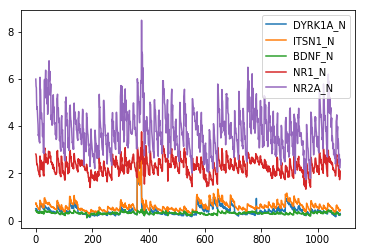

In [12]:
print(list(fill_protein.iloc[:,0:5]))
fill_protein.iloc[:,0:5].plot()

### 2. 盒鬚圖
* 以 DYRK1A_N 為例
* 將資料分組畫 boxplot 可看出各 class 的資料離散程度
* 例如 c-CS-s 就有一些離群值，如同作業三最後提到的。

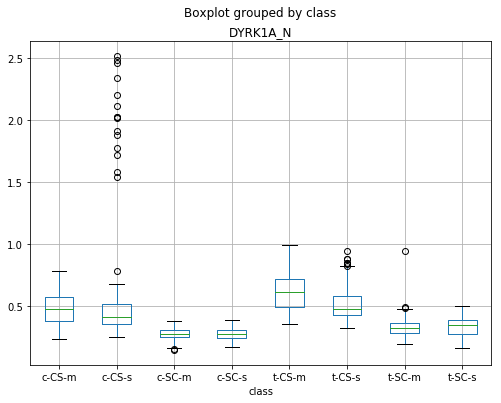

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.suptitle('')
fill_protein.boxplot(column=['DYRK1A_N'], by='class', ax=ax)

### 3. 直方圖
* 此例我挑前 4 個 attribute，['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N']
* 和 box plot 一樣可看出資料離散程度，像 DYRK1A_N 和 ITSN1_N 都有一些右邊的離群值
* histogram 看不出 box plot 能表示的四分位距和平均值
    * 但可看出眾數大概的位置，如 DYRK1A_N 的眾數大概落在 0.25 
    * (box plot 看不出來)
* y 軸是資料筆數
* x 軸是蛋白質表現程度的數值 (每個區間寬度是 0.25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80385f7ef0>,
      dtype=object)

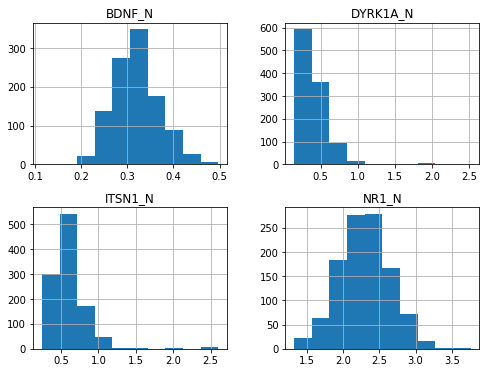

In [14]:
fill_protein.iloc[:,0:4].hist(figsize=(8,6))

* 只觀察 DYRK1A_N，
    將其以 Genotype 分為 Control(正常) 和 Ts65Dn(唐氏症) 分別作圖
* 可以看到 Control 有較多導致右偏的離群值，應為 c-CS-s 類的那幾個點。

Genotype
Control    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Ts65Dn     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

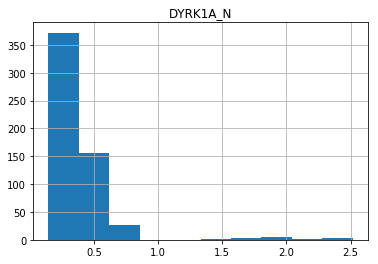

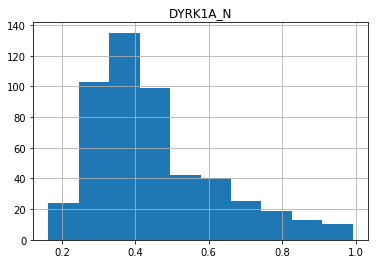

In [15]:
fill_protein.groupby('Genotype').hist(column=['DYRK1A_N'])

### 4. 散佈圖
* 將前 17 個 attribute 任兩個取起來畫圖 (pairplot)
* 可以看出其相關性
* 對角線則是該 attribute 分組的折線圖（類似 histogram）

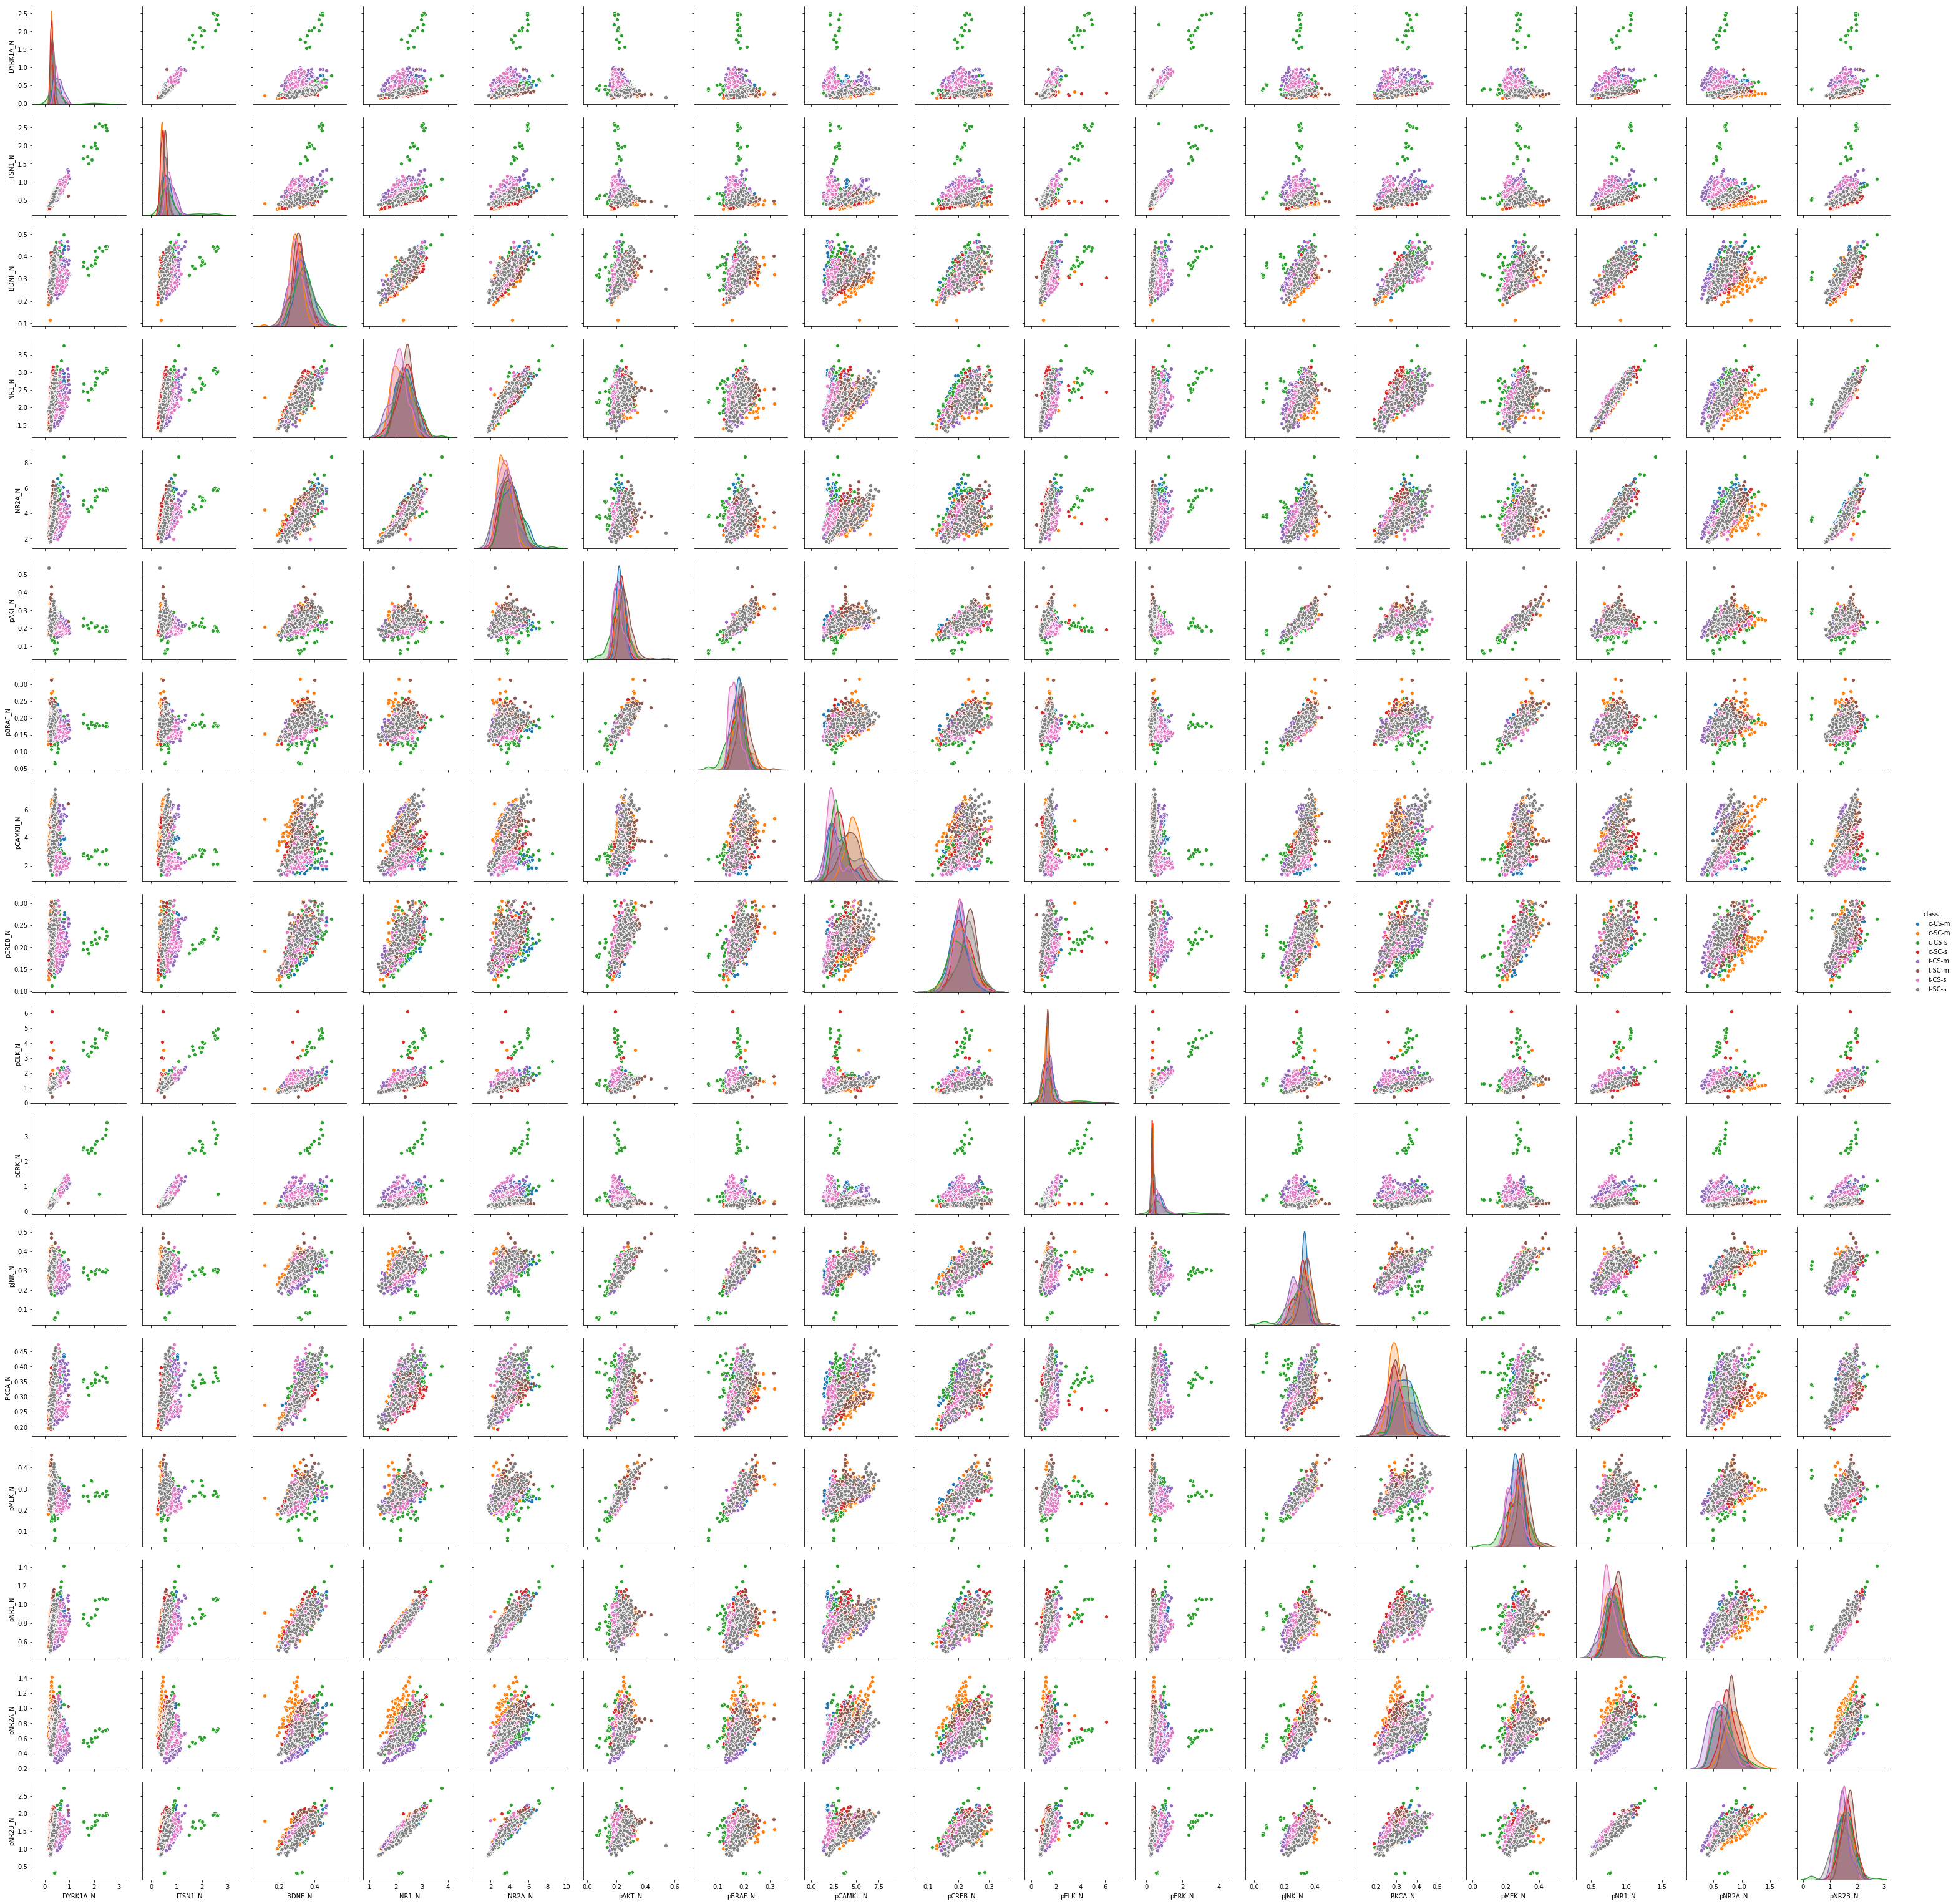

In [16]:
sns.pairplot(fill_protein, hue='class')

* 各 attribute 的 histogram (參考)

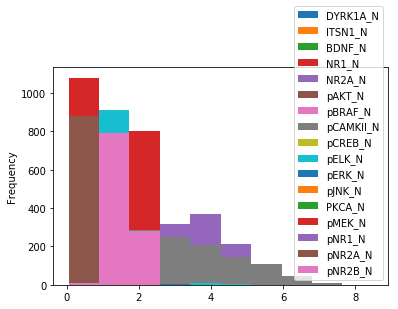

In [17]:
fill_protein.plot(kind='hist')

#### 例 4-1
* 挑出 NR1_N 和 pNR1_N 畫散佈圖，可觀察知這兩種蛋白質的表現程度成高度正相關(對於所有樣本)。
* 實際上，兩種是類似的蛋白質(皆為 NMDA 受器)，因此生物機制上的確有高度相關性。

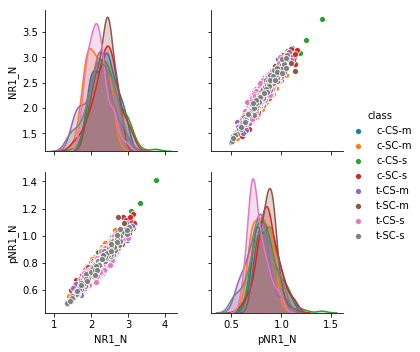

In [18]:
Relation = pd.concat([fill_protein['NR1_N'], fill_protein['pNR1_N']], axis=1)
Relation = pd.concat([Relation, proteinClass], axis=1)

sns.pairplot(Relation, hue='class')

#### 例 4-2
* 一次畫上 8 種 class 的點有點繁雜<br>
附上以基因型(Genotype)、藥物注射(Treatment)、學習刺激(Behavior)分別著色的散佈圖。

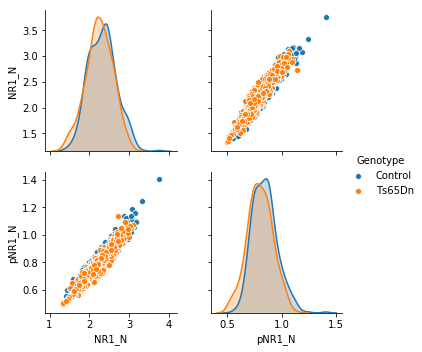

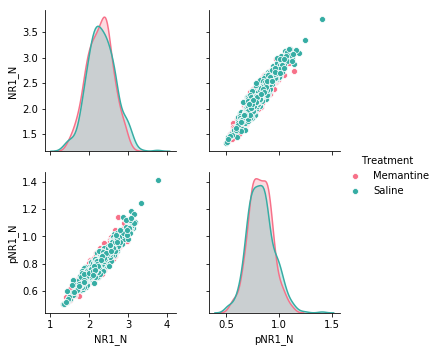

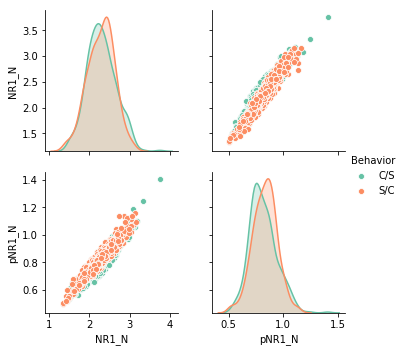

In [19]:
sns.pairplot(Relation, hue='Genotype')
sns.pairplot(Relation, hue='Treatment', palette="husl")
sns.pairplot(Relation, hue='Behavior', palette="Set2")

#### 例 4-3
* 挑出 DYRK1A_N 和 ITSN1_N 畫散佈圖，除了兩個 attribute 成正相關。
* 同時可發現綠色的點 (c-CS-s) 對於此兩 attribute 都算是離群值。

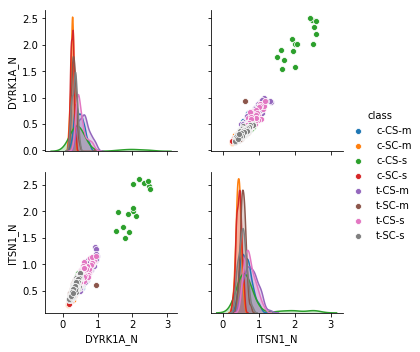

In [20]:
Relation2 = pd.concat([fill_protein['DYRK1A_N'], fill_protein['ITSN1_N']], axis=1)
Relation2 = pd.concat([Relation2, proteinClass], axis=1)

sns.pairplot(Relation2, hue='class')

### 5. 不使用圓餅圖
* 以我個人感受而言，我覺得圓餅圖不適合作為資料視覺化
* 人眼對於二維圖形的大小比例關係並無法判斷的很精準，
    也許判斷相對大小沒問題，但判斷絕對大小卻很困難。

* google "pie chart" 其實也可看到很多爭論。
* 參考：https://blog.funnel.io/why-we-dont-use-pie-charts-and-some-tips-on-better-data-visualizations


## Hw5
<a href="#%E6%95%B8%E6%93%9A%E7%A7%91%E5%AD%B8%E6%A6%82%E8%AB%96-Hw5-(%E5%90%AB-Hw4-%E4%BB%A5%E5%89%8D)">Top</a>

1. <a href="#1.-IQR">IQR</a>
2. <a href="#2.-Sorting">Sorting</a>
3. <a href="#3.-correlation-matrix">correlation matrix</a>
4. <a href="#4.-box-plot">box plot</a>
5. <a href="#5.-histogram-with-density">histogram with density</a>
6. <a href="#6.-others-discussion">other discussion</a>

### 1. IQR
* 以前 17 個蛋白質表現量為例，其實直接下 describe() 就會列出四分位數 (25%, 50%, 75%)

In [21]:
fill_protein.describe()

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.425565     0.616913     0.319106     2.297134     3.843159   
std       0.249058     0.251316     0.049316     0.346819     0.931918   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288163     0.473669     0.287650     2.059152     3.160287   
50%       0.366125     0.565494     0.316703     2.295648     3.738908   
75%       0.487574     0.697500     0.348039     2.528035     4.425107   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.233206     0.181856     3.538885     0.212614     1.428060   
std       0.041583     0.027005     1.293806     0.032551     0.466403   
min       0.063236     0.064043     1.343998     0.112812     0.429032   
25%       0.205821     0.164619     2.479861     0.190828     1.204546   
50%       0.231246     0.182472     3.329624     0.210681     1.355423   
75%       0.257225     0.197226     4.480652     0.234558     1.560931   
max       0.539050     0.317066     7.464070     0.306247     6.113347   

            pERK_N       pJNK_N       PKCA_N       pMEK_N       pNR1_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.545381     0.313519     0.317961     0.275076     0.825752   
std       0.344971     0.051906     0.052165     0.046106     0.117811   
min       0.149155     0.052110     0.191431     0.056818     0.500160   
25%       0.337486     0.281530     0.281850     0.244294     0.743594   
50%       0.443122     0.321266     0.313028     0.277463     0.820850   
75%       0.663173     0.348692     0.352272     0.303355     0.898339   
max       3.566685     0.493426     0.473992     0.458001     1.408169   

           pNR2A_N      pNR2B_N  
count  1080.000000  1080.000000  
mean      0.726782     1.561612  
std       0.187773     0.270444  
min       0.281285     0.301609  
25%       0.591311     1.381308  
50%       0.719527     1.563239  
75%       0.847276     1.748498  
max       1.412750     2.723965

* 或我們可以只取 25th 百分位數和 75th 百分位數求差，即為四分位距 (IQR)

In [22]:
Q1 = fill_protein.quantile(q=0.25)
Q3 = fill_protein.quantile(q=0.75)
IQR = Q3-Q1

row_name=['Q3', 'Q1', 'IQR']
IQR_DF = pd.DataFrame([Q3, Q1, IQR], row_name)
IQR_DF.assign()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
Q3   0.487574  0.697500  0.348039  2.528035  4.425107  0.257225  0.197226   
Q1   0.288163  0.473669  0.287650  2.059152  3.160287  0.205821  0.164619   
IQR  0.199411  0.223832  0.060388  0.468882  1.264820  0.051404  0.032608   

     pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
Q3    4.480652  0.234558  1.560931  0.663173  0.348692  0.352272  0.303355   
Q1    2.479861  0.190828  1.204546  0.337486  0.281530  0.281850  0.244294   
IQR   2.000792  0.043730  0.356385  0.325687  0.067162  0.070422  0.059060   

       pNR1_N   pNR2A_N   pNR2B_N  
Q3   0.898339  0.847276  1.748498  
Q1   0.743594  0.591311  1.381308  
IQR  0.154744  0.255965  0.367190

### 2. Sorting
* 取前五個蛋白質表現量為例，預設為 descending
* 為了方便看結果，下 head() 只取前五 row 

In [23]:
fill_protein.iloc[:,0:5].sort_values(by=['NR1_N']).head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N
957  0.216134  0.364058  0.241693  1.330831  1.737540
958  0.212369  0.369960  0.239036  1.346827  1.814940
192  0.145327  0.245359  0.185980  1.403329  2.290973
974  0.226491  0.380497  0.194160  1.414914  1.794716
954  0.238836  0.384145  0.234618  1.440000  1.928436

* 其實也可以用多變數排序，例如先排 DYRK1A_N，有相等的 DYRK1A_N 再以 ITSN1_N 排序
* 但因為此資料集為浮點數，幾乎沒什麼相同的值，所以通常用一個變數就能排序完了

In [24]:
fill_protein.iloc[:,0:5].sort_values(by=['DYRK1A_N', 'ITSN1_N']).head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N
192   0.145327  0.245359  0.185980  1.403329  2.290973
193   0.156849  0.261185  0.197271  1.496977  2.473830
1063  0.163325  0.332454  0.255145  1.901847  2.445910
189   0.164330  0.290535  0.212387  1.670465  2.819603
190   0.168493  0.292269  0.198159  1.634955  2.726874

### 3. correlation matrix
* 為方便看結果，挑前十項蛋白質表現量印出 correlation matrix 及做圖 (heatmap)

#### 3-1 correlation matrix

In [57]:
pcorr=fill_protein.iloc[:,0:10].corr()
pcorr.assign()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
DYRK1A_N   1.000000  0.959513  0.359232  0.294604  0.325260 -0.181222   
ITSN1_N    0.959513  1.000000  0.459727  0.422543  0.426311 -0.147983   
BDNF_N     0.359232  0.459727  1.000000  0.805691  0.749772  0.317602   
NR1_N      0.294604  0.422543  0.805691  1.000000  0.873872  0.211376   
NR2A_N     0.325260  0.426311  0.749772  0.873872  1.000000  0.109871   
pAKT_N    -0.181222 -0.147983  0.317602  0.211376  0.109871  1.000000   
pBRAF_N   -0.093845 -0.076594  0.390559  0.244162  0.111020  0.825115   
pCAMKII_N -0.180563 -0.133182  0.246851  0.300849  0.280193  0.457393   
pCREB_N    0.046837  0.170720  0.603838  0.597086  0.392165  0.597263   
pELK_N     0.791254  0.780957  0.451267  0.416671  0.409719  0.037076   

            pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  
DYRK1A_N  -0.093845  -0.180563  0.046837  0.791254  
ITSN1_N   -0.076594  -0.133182  0.170720  0.780957  
BDNF_N     0.390559   0.246851  0.603838  0.451267  
NR1_N      0.244162   0.300849  0.597086  0.416671  
NR2A_N     0.111020   0.280193  0.392165  0.409719  
pAKT_N     0.825115   0.457393  0.597263  0.037076  
pBRAF_N    1.000000   0.372253  0.586975  0.116827  
pCAMKII_N  0.372253   1.000000  0.404827 -0.083623  
pCREB_N    0.586975   0.404827  1.000000  0.211590  
pELK_N     0.116827  -0.083623  0.211590  1.000000

#### 3-2 correlation matrix with heatmap 

In [63]:
pcorr.style.background_gradient().set_precision(2)

#### 3-3 heatmap to show correlation

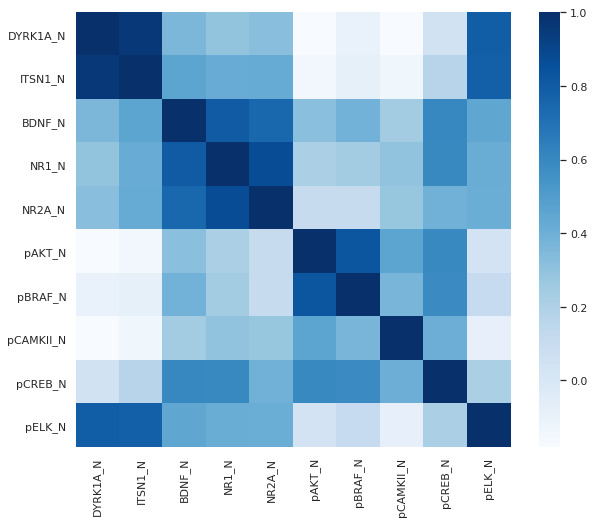

In [67]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(pcorr, mask=np.zeros_like(pcorr, dtype=np.bool), cmap="Blues",
            square=True, ax=ax)

### 4. box plot

* 以 DYRK1A_N 為例
* 將資料分組畫 boxplot 可看出各 class 的資料離散程度
* 例如 c-CS-s 就有一些離群值，如同作業三和作業四提到的。

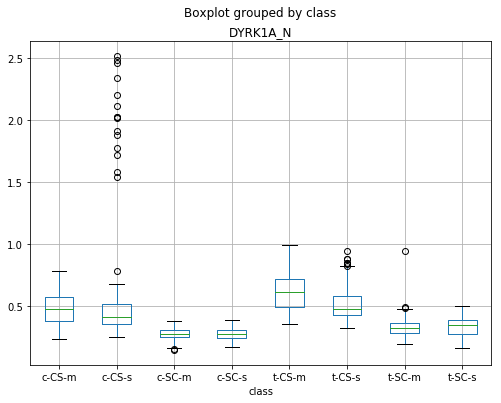

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.suptitle('')
fill_protein.boxplot(column=['DYRK1A_N'], by='class', ax=ax)

* 也可以用 Genotype 分別畫 box plot

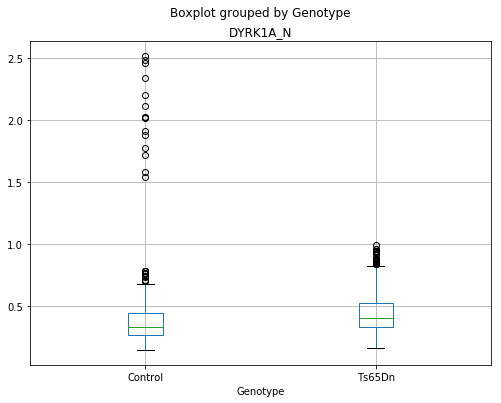

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.suptitle('')
fill_protein.boxplot(column=['DYRK1A_N'], by='Genotype', ax=ax)

### 5. histogram with density
* 以前 4 個蛋白質表現量為例

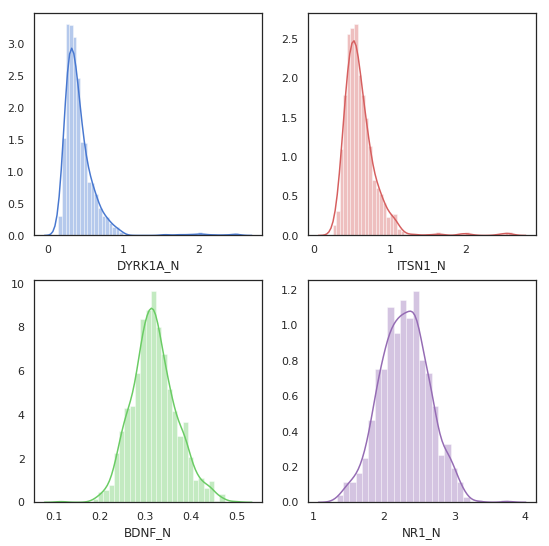

In [99]:
sns.set(style="white", palette="muted", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(9,9))
sns.distplot(fill_protein['DYRK1A_N'], color="b", ax=axes[0, 0])
sns.distplot(fill_protein['ITSN1_N'], color="r", ax=axes[0, 1])
sns.distplot(fill_protein['BDNF_N'], color="g", ax=axes[1, 0])
sns.distplot(fill_protein['NR1_N'], color="m", ax=axes[1, 1])
#plt.setp(axes)
#plt.tight_layout()
plt.show()

### 6. others discussion
* 這份資料的數值可解釋性我覺得不算高，不太好理解每欄的數值到底代表什麼意思，但由這些作圖其實可以找出一些分布相似或是相關性高的屬性。
    * 例如 **[DYRK1A_N, ITSN1_N]** 或是 **[NR1_N, pNR1_N]** 
* 這個資料集還蠻適合做 clustering 或 classification，接下來我應該會試著用 self-organizing map 來做 clustering<br>
  找出相關性高的 attribute 除了更方便分群合併相鄰 attribute 外，<br>
  也適合在降維(PCA,LDA)的時候把不相關的幾個 attribute 先剔除，降低整體複雜度。